In [ ]:
# data-

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/covid_toy - covid_toy.csv')

In [ ]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(columns=['has_covid'])
y=df['has_covid']
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

In [ ]:
categorical_features=['gender','city']
numeric_features=['age','fever']

In [ ]:
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fever']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'city'])])

In [ ]:
df=pd.read_csv('/content/insurance - insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
x=df.drop(columns='charges')
y=df['charges']

In [ ]:
categorical_features=['sex','smoker','region']
numeric_features=['age','bmi','children']

In [ ]:
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'smoker', 'region'])])

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/dsjob - dsjob.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [4]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [5]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [6]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [7]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
413,no_enrollment,Graduate,1,NaN
405,no_enrollment,Graduate,7,2
1046,Full time course,Graduate,4,1
1109,Full time course,Graduate,5,1
435,no_enrollment,Masters,3,1


In [8]:
df['education_level'].value_counts()

,count
education_level,
Graduate,1269
Masters,496
High School,222
Phd,54
Primary School,36


In [9]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [10]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((2129, 13), (2018, 4))

In [12]:
import matplotlib.pyplot as plt

<Axes: >

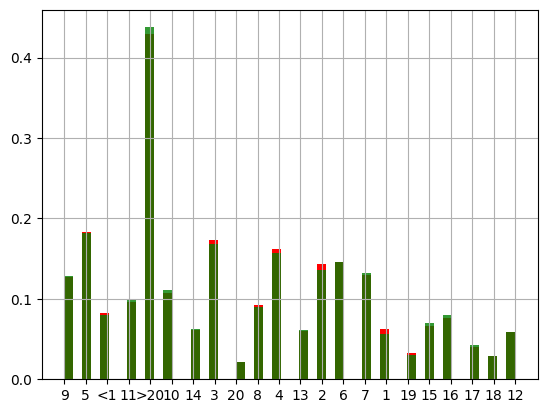

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')

#data after cca the argument aplha makes the color transparent ,so we can
#see the overlay of the 2 distributions
new_df['experience'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

In [14]:
df=pd.read_csv('/content/titanic - titanic.csv')

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234


In [18]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['Fare']

In [19]:
df[cols].sample(5)

,Fare
158,26.5500
326,39.0000
236,75.2500
243,7.8875
363,8.6625


In [20]:
len(df[cols].dropna())/len(df)

0.9976076555023924

In [21]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((418, 12), (417, 1))

<Axes: >

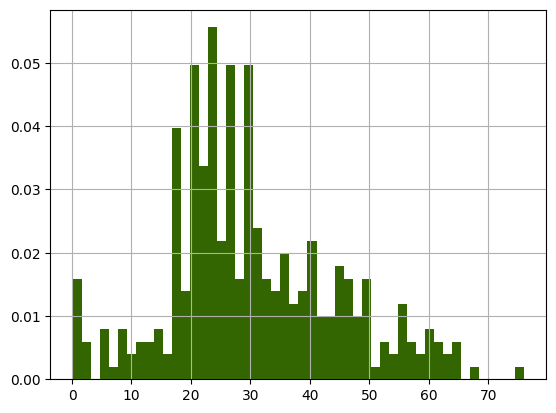

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['Age'].hist(bins=50,ax=ax,density=True,color='red')

df['Age'].dropna().hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

In [24]:
df=pd.read_csv('/content/covid_toy - covid_toy.csv')

In [25]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


In [30]:
df.isnull().mean()*100

,0
age,0.0
gender,0.0
fever,0.0
cough,0.0
city,0.0
has_covid,0.0


In [27]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

[]

In [28]:
df['fever']

,fever
0,103.0
1,100.0
2,101.0
3,98.0
4,101.0
...,...
95,104.0
96,101.0
97,101.0
98,98.0


In [29]:
df['fever']=df['fever'].fillna(df['fever'].mode()[0])

<Axes: >

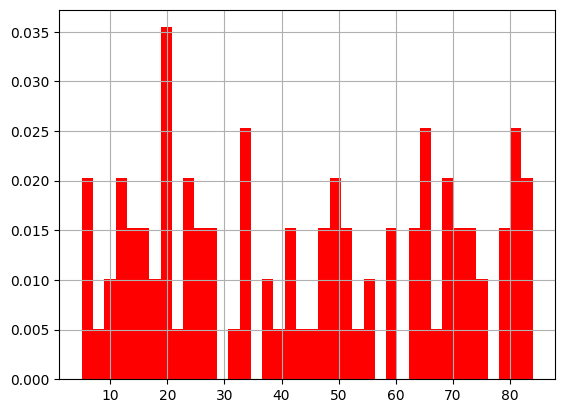

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['age'].hist(bins=40,ax=ax,density=True,color='red')